In [1]:
from grab_db import my_db
import numpy as np
import pandas as pd
import sklearn.preprocessing
from zillow_wrangle import my_train_test_split, clean_zillow, plot_variable_pairs, plot_categorical_and_continuous_vars, get_zillow_data
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
from evaluate import plot_residuals, regression_errors, baseline_mean_errors, better_than_baseline

In [2]:
zillow = get_zillow_data()

In [3]:
zillow = clean_zillow(zillow)

In [4]:
zillow

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,location,age
0,2.0,4.0,3633.0,296425.0,0,17.0
1,4.0,3.0,1620.0,847770.0,0,11.0
2,2.0,3.0,2077.0,646760.0,0,96.0
3,0.0,0.0,1200.0,5328.0,0,50.0
4,0.0,0.0,171.0,6920.0,0,49.0
...,...,...,...,...,...,...
2142798,4.0,4.0,4375.0,422400.0,0,7.0
2142799,3.0,4.0,2262.0,960756.0,1,7.0
2142800,4.5,4.0,3127.0,536061.0,1,8.0
2142801,2.5,3.0,1974.0,424353.0,1,7.0


In [5]:
train, validate, test = my_train_test_split(zillow)
x_train = train.drop(columns = 'taxvaluedollarcnt')
y_train = train.taxvaluedollarcnt

## BASELINE:

In [6]:
train['baseline'] = train.taxvaluedollarcnt.mean()
baseline = train.taxvaluedollarcnt.mean()

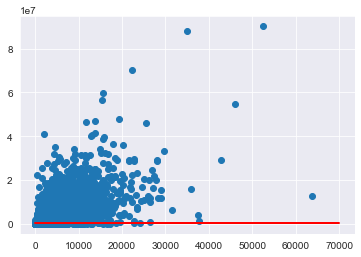

In [7]:
plt.plot(train.calculatedfinishedsquarefeet,train.taxvaluedollarcnt,'o')
plt.plot([0,70000], [baseline, baseline], color='red', linestyle='-', linewidth=2)
plt.show()


## Model:

In [8]:
model = LinearRegression().fit(train[['calculatedfinishedsquarefeet']], train.taxvaluedollarcnt)

In [9]:
train['predictions'] = model.predict(train[['calculatedfinishedsquarefeet']])

In [10]:
train

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,location,age,baseline,predictions
564018,1.0,3.0,1373.0,46093.0,0,75.0,461142.904974,2.516974e+05
2131776,3.0,5.0,2668.0,320600.0,0,19.0,461142.904974,8.055774e+05
1384152,2.0,4.0,2048.0,365818.0,0,102.0,461142.904974,5.403993e+05
577743,1.0,3.0,936.0,253220.0,1,76.0,461142.904974,6.478963e+04
2131422,3.0,3.0,3166.0,592709.0,1,33.0,461142.904974,1.018575e+06
...,...,...,...,...,...,...,...,...
1864178,3.0,5.0,2736.0,275000.0,0,17.0,461142.904974,8.346615e+05
1094831,2.0,3.0,1560.0,346956.0,0,27.0,461142.904974,3.316785e+05
946271,2.0,3.0,1905.0,355145.0,0,75.0,461142.904974,4.792373e+05
134615,1.0,2.0,1011.0,340688.0,0,100.0,461142.904974,9.686762e+04


In [11]:
train['residual'] = train['predictions'] - train['taxvaluedollarcnt']

In [12]:
train['baseline_residual'] = train['baseline'] - train['taxvaluedollarcnt']

In [13]:
train

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,location,age,baseline,predictions,residual,baseline_residual
564018,1.0,3.0,1373.0,46093.0,0,75.0,461142.904974,2.516974e+05,205604.399391,415049.904974
2131776,3.0,5.0,2668.0,320600.0,0,19.0,461142.904974,8.055774e+05,484977.406731,140542.904974
1384152,2.0,4.0,2048.0,365818.0,0,102.0,461142.904974,5.403993e+05,174581.333719,95324.904974
577743,1.0,3.0,936.0,253220.0,1,76.0,461142.904974,6.478963e+04,-188430.371426,207922.904974
2131422,3.0,3.0,3166.0,592709.0,1,33.0,461142.904974,1.018575e+06,425866.278280,-131566.095026
...,...,...,...,...,...,...,...,...,...,...
1864178,3.0,5.0,2736.0,275000.0,0,17.0,461142.904974,8.346615e+05,559661.453449,186142.904974
1094831,2.0,3.0,1560.0,346956.0,0,27.0,461142.904974,3.316785e+05,-15277.472136,114186.904974
946271,2.0,3.0,1905.0,355145.0,0,75.0,461142.904974,4.792373e+05,124092.294298,105997.904974
134615,1.0,2.0,1011.0,340688.0,0,100.0,461142.904974,9.686762e+04,-243820.378723,120454.904974


Regression line:

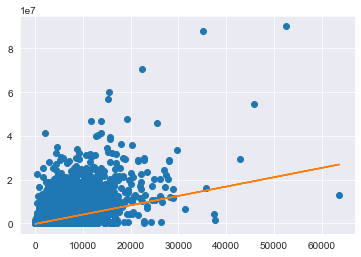

In [14]:
plt.plot(train.calculatedfinishedsquarefeet,train.taxvaluedollarcnt,'o')
plt.plot(train.calculatedfinishedsquarefeet,train.predictions)
plt.show()

Residuals:

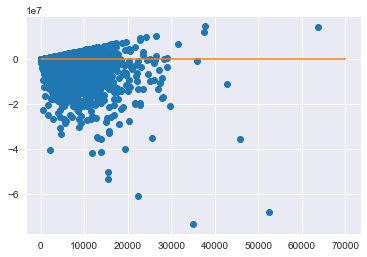

In [15]:
plt.plot(train.calculatedfinishedsquarefeet,train.residual,'o')
plt.plot([0,70000],[0,0])
plt.show()

Baseline Residuals

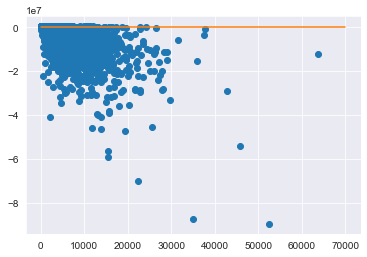

In [16]:
plt.plot(train.calculatedfinishedsquarefeet,train.baseline_residual,'o')
plt.plot([0,70000],[0,0])
plt.show()

SSE:

In [17]:
train['residual_squared'] = train.residual ** 2
train['baseline_residual_squared'] = train.baseline_residual ** 2

In [18]:
train

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,location,age,baseline,predictions,residual,baseline_residual,residual_squared,baseline_residual_squared
564018,1.0,3.0,1373.0,46093.0,0,75.0,461142.904974,2.516974e+05,205604.399391,415049.904974,4.227317e+10,1.722664e+11
2131776,3.0,5.0,2668.0,320600.0,0,19.0,461142.904974,8.055774e+05,484977.406731,140542.904974,2.352031e+11,1.975231e+10
1384152,2.0,4.0,2048.0,365818.0,0,102.0,461142.904974,5.403993e+05,174581.333719,95324.904974,3.047864e+10,9.086838e+09
577743,1.0,3.0,936.0,253220.0,1,76.0,461142.904974,6.478963e+04,-188430.371426,207922.904974,3.550600e+10,4.323193e+10
2131422,3.0,3.0,3166.0,592709.0,1,33.0,461142.904974,1.018575e+06,425866.278280,-131566.095026,1.813621e+11,1.730964e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
1864178,3.0,5.0,2736.0,275000.0,0,17.0,461142.904974,8.346615e+05,559661.453449,186142.904974,3.132209e+11,3.464918e+10
1094831,2.0,3.0,1560.0,346956.0,0,27.0,461142.904974,3.316785e+05,-15277.472136,114186.904974,2.334012e+08,1.303865e+10
946271,2.0,3.0,1905.0,355145.0,0,75.0,461142.904974,4.792373e+05,124092.294298,105997.904974,1.539890e+10,1.123556e+10
134615,1.0,2.0,1011.0,340688.0,0,100.0,461142.904974,9.686762e+04,-243820.378723,120454.904974,5.944838e+10,1.450938e+10


In [19]:
SSE = sum(train.residual_squared)
baseline_SSE = sum(train.baseline_residual_squared)

In [20]:
SSE

3.7227802196742906e+17

In [21]:
baseline_SSE

5.953561049938085e+17

In [22]:
if SSE > baseline_SSE:
    print('SSE > baseline_SSE')
else:
    print('baseline_SSE > SSE')

baseline_SSE > SSE


In [23]:
MSE = SSE/len(train)
MSE

289557068952.1188

In [24]:
baseline_MSE = baseline_SSE/len(train)

In [25]:
baseline_MSE

463066736611.81

In [26]:
if MSE > baseline_MSE:
    print('MSE > baseline MSE')
else:
    print('baseline_MSE > MSE')

baseline_MSE > MSE


In [27]:
from math import sqrt
RMSE = sqrt(MSE)
baseline_RMSE = sqrt(baseline_MSE)

print("RMSE = ", RMSE)
print("RMSE baseline = ", baseline_RMSE)


RMSE =  538105.0724088361
RMSE baseline =  680490.070913463


In [28]:
# compute explained sum of squares
ESS = sum((train.residual - train.taxvaluedollarcnt.mean())**2)


In [29]:
TSS = ESS + SSE

In [30]:
R2 = ESS/TSS
print('R-squared = ',round(R2,3))
print("Percent of variance in y explained by x = ", round(R2*100,1), "%")


R-squared =  0.634
Percent of variance in y explained by x =  63.4 %


My model is better than the baseline

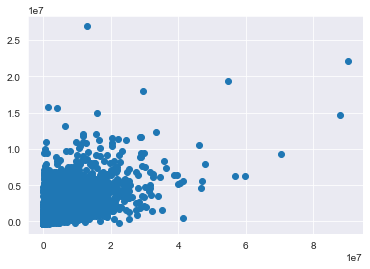

In [31]:
plt.scatter(train.taxvaluedollarcnt,train.predictions)

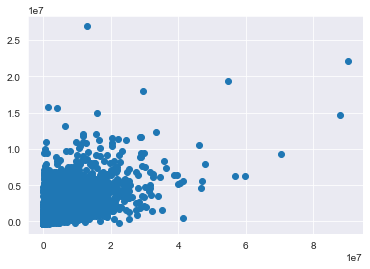

In [32]:
plot_residuals(train.taxvaluedollarcnt,train.predictions)

In [33]:
regression_errors(train.taxvaluedollarcnt,train.predictions)

('SSE = ',
 3.7227802196742906e+17,
 'MSE = ',
 289557068952.1188,
 'RMSE = ',
 538105.0724088361,
 'ESS = ',
 6.456816592780056e+17,
 'TSS = ',
 1.0179596812454346e+18)

In [34]:
baseline_mean_errors(train.taxvaluedollarcnt)

('SSE = ',
 5.953561049938085e+17,
 'MSE = ',
 463066736611.81,
 'RMSE = ',
 680490.070913463)

In [37]:
better_than_baseline(train.taxvaluedollarcnt,train.predictions)

True